In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data.csv')

df.head()

/var/folders/3v/zzvprhmx34n2pwbb921ncnq80000gn/T/ipykernel_68165/2731483192.py:6: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,26,27,28,29,30,31,35,36,37,80,81,82,83,84,85,86,88,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Region,LPANM,LPACD,Quarter,Applications at beginning of the quarter,Applications received,Applications decided,Applications withdrawn,Applications at end of the quarter,Application decisions delegated,...,Certificates of appropriate alternative development,Certificates of lawfulness of proposed works to listed buildings,Enforcement notices issued,Stop notices served,Temporary stop notices served,Planning contravention notices served,Breach of condition notices served,Enforcement injunctions granted,Enforcement injunctions rejected,F_Year
0,South East,Adur,E07000223,1996 Q2,291,365,369,15,272,0,...,..,..,2,0,0,4,0,0,0,1996-97
1,North West,Allerdale,E07000026,1996 Q2,208,298,265,3,238,0,...,..,..,7,0,0,21,2,1,0,1996-97
2,North West,Allerdale (within National Park boundaires),N0906,1996 Q2,80,77,70,1,86,0,...,..,..,0,0,0,1,0,0,0,1996-97
3,North East,Alnwick,Q2908,1996 Q2,194,108,127,1,174,0,...,..,..,0,0,0,0,0,0,0,1996-97
4,North East,Alnwick (within National Park boundaires),X2906,1996 Q2,9,7,2,0,14,0,...,..,..,0,0,0,0,0,0,0,1996-97


In [80]:
df.rename(columns={
    'Applications at beginning of the quarter': 'Applications_Start',
    # ... other renames
}, inplace=True)
df.rename(columns={'Quarters': 'Quarter'}, inplace=True)
df['Quarter'] = df['Quarter'].str.replace(' ', '')
df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')

In [82]:
print(df['Quarter'].head())

0    1996Q2
1    1996Q2
2    1996Q2
3    1996Q2
4    1996Q2
Name: Quarter, dtype: period[Q-DEC]


In [88]:
target_quarter = pd.Period('2024Q1', freq='Q')
df_2024Q1 = df[df['Quarter'] == target_quarter]

In [94]:
total_applications_start = df_2024Q1['Applications_Start'].sum()
print(f"Total Applications_Start for 2024Q1: {total_applications_start}")

Total Applications_Start for 2024Q1: 120304


In [100]:
quarters_to_plot = [pd.Period('2023Q4', freq='Q'), pd.Period('2024Q1', freq='Q')]
df_filtered = df[df['Quarter'].isin(quarters_to_plot)]
totals = df_filtered.groupby('Quarter')['Applications_Start'].sum().reset_index()
totals['Quarter'] = totals['Quarter'].astype(str)

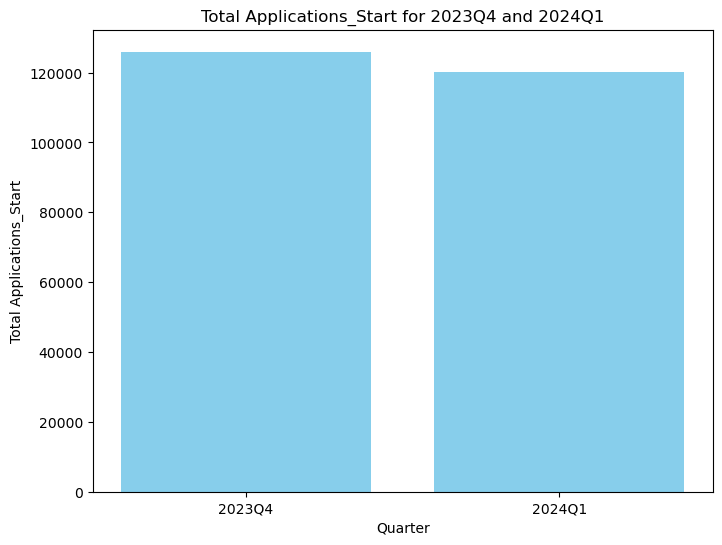

In [102]:
plt.figure(figsize=(8, 6))
plt.bar(totals['Quarter'], totals['Applications_Start'], color='skyblue')
plt.title('Total Applications_Start for 2023Q4 and 2024Q1')
plt.xlabel('Quarter')
plt.ylabel('Total Applications_Start')
plt.show()